# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
//TFile *file = TFile::Open("Tracks_Clusters.root"); 
TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". 

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Leading jet pT and all jets pT 

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

Loop and fill histograms

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


<p>Draw</p>

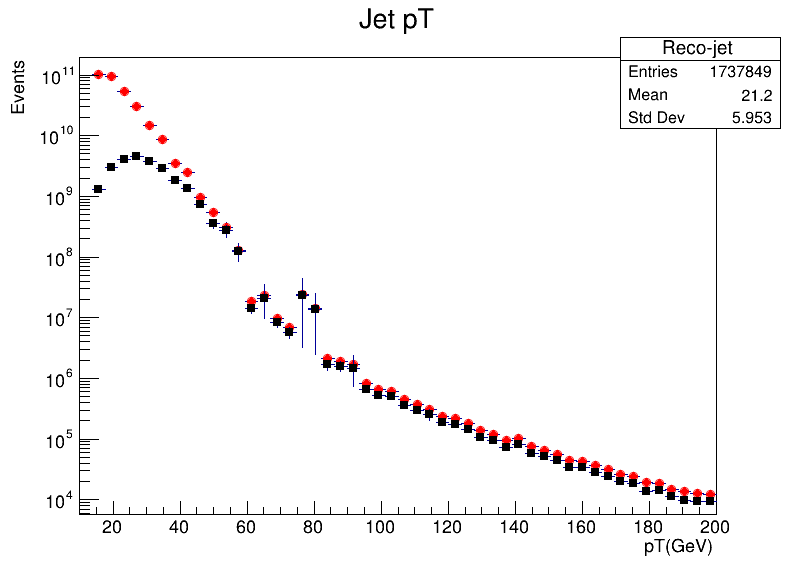

In [8]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
    2. Repeat for all jets pT.
</b>

# Excersice 1: Leading truth jet pT & reco jet pT without event weights

In [9]:
TH1F *hist_leadreco_pt_wo_evtw = new TH1F("Lead jet pT","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt_wo_evtw = new TH1F("Lead jet pT","Leading jet pT; pT(GeV);Events",50,10,200);

int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_wo_evtw->Fill(reco_R4_pt->at(0)/1000.); //without event weight 
    }
    
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt_wo_evtw->Fill(truth_R4_pt->at(0)/1000.);  //without event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: Lead jet pT (Potential memory leak).


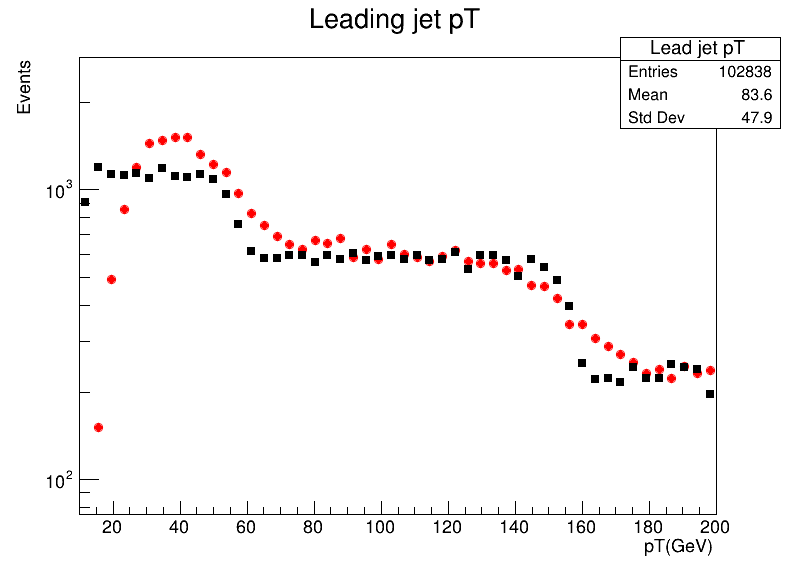

In [10]:
//Draw the histograms that compare lead reco jet pT and truth jet pT

hist_leadreco_pt_wo_evtw->SetMarkerStyle(20);
hist_leadreco_pt_wo_evtw->SetMarkerColor(kRed);
hist_leadreco_pt_wo_evtw->SetFillStyle(1001);
hist_leadreco_pt_wo_evtw->SetFillColor(kRed);
hist_leadreco_pt_wo_evtw->Draw("P");
hist_leadtruth_pt_wo_evtw->SetMarkerStyle(21);
hist_leadtruth_pt_wo_evtw->SetMarkerColor(kBlack);
hist_leadtruth_pt_wo_evtw->SetFillStyle(1003);
hist_leadtruth_pt_wo_evtw->SetFillColor(kBlack);
hist_leadtruth_pt_wo_evtw->Draw("sameP");
canvas->SetLogy();
canvas->Draw();

# Comparison between leading truth jet and reco jet pT with events weights

In [11]:
TH1F *hist_leadreco_pt_evtw = new TH1F("Lead jet pT evtw","Leading jet pT evtw; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt_evtw = new TH1F("Lead jet pT evtw","Leading jet pT evtw; pT(GeV);Events",50,10,200);

int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_evtw->Fill(reco_R4_pt->at(0)/1000., evtw); //with event weight 
    }
    
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt_evtw->Fill(truth_R4_pt->at(0)/1000., evtw);  //with event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: Lead jet pT evtw (Potential memory leak).


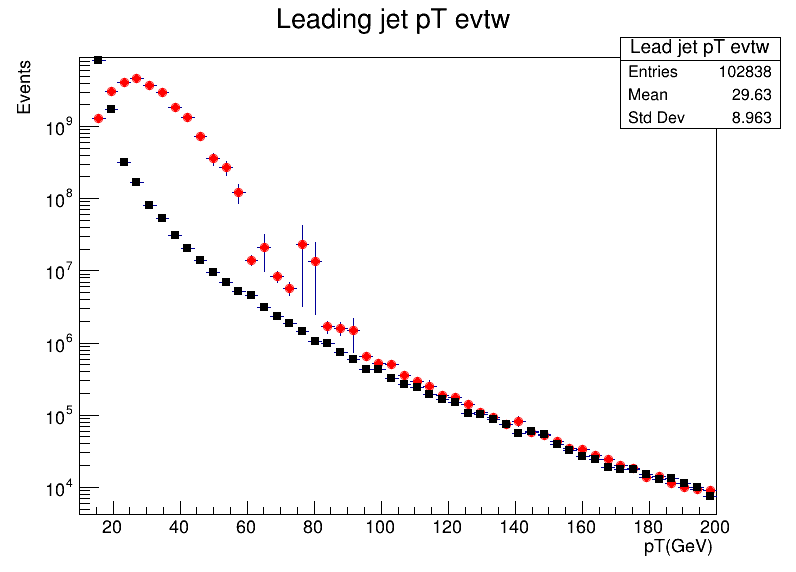

In [12]:
//Draw the histograms that compare lead reco jet pT and truth jet pT

hist_leadreco_pt_evtw->SetMarkerStyle(20);
hist_leadreco_pt_evtw->SetMarkerColor(kRed);
hist_leadreco_pt_evtw->SetFillColor(kRed);
hist_leadreco_pt_evtw->Draw("");
hist_leadtruth_pt_evtw->SetMarkerStyle(21);
hist_leadtruth_pt_evtw->SetMarkerColor(kBlack);
hist_leadtruth_pt_evtw->SetFillColor(kBlack);
hist_leadtruth_pt_evtw->Draw("same");
canvas->SetLogy();
canvas->Draw();

# Excersice 2: Repeat for all jets pT.

## All jets without event weight

In [13]:
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth_jet","Jet pT; pT(GeV);Events", 50, 10, 200);

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R4_pt->size()>0)
    {
        for(int jj=0; jj<reco_R4_pt->size(); jj++)
        {
            hist_reco_pt->Fill(reco_R4_pt->at(jj)/1000.);
        }
    }
    
    if(truth_R4_pt->size()>0)
    {
        for(int jj=0; jj<truth_R4_pt->size(); jj++)
        {
            hist_truth_pt->Fill(truth_R4_pt->at(jj)/1000.);
        }
    }
}

Warning in <TDavixFile::Append>: Replacing existing TH1: Reco-jet (Potential memory leak).


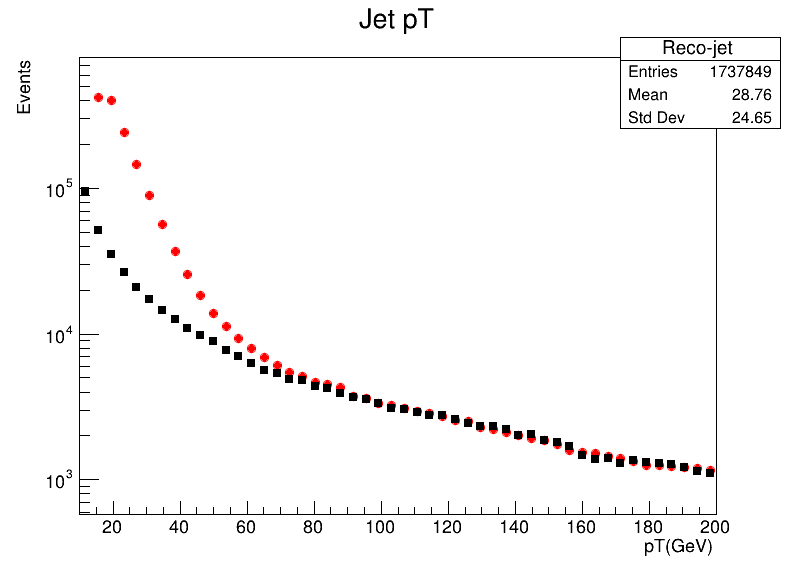

In [14]:
//Draw the histograms that compare all reco jet pT and truth jet pT without event weight

hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->SetFillStyle(1001);
hist_reco_pt->SetFillColor(kRed);
hist_reco_pt->Draw("P");
hist_truth_pt->SetMarkerStyle(21);
hist_truth_pt->SetMarkerColor(kBlack);
hist_truth_pt->SetFillStyle(1003);
hist_truth_pt->SetFillColor(kRed);
hist_truth_pt->Draw("sameP");
canvas->SetLogy();
canvas->Draw();

In [15]:
TH1F *hist_reco_pt_evtw = new TH1F("Reco-jet evtw", "Reco jet pT evtw; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt_evtw = new TH1F("Truth-jet evtw", "Truth jet pT evtw; pT(GeV);Events",50,10,200);

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R4_pt->size()>0)
    {
        for(int jj=0; jj<reco_R4_pt->size(); jj++)
        {
            hist_reco_pt_evtw->Fill(reco_R4_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R4_pt->size()>0)
    {
        for(int jj=0; jj<truth_R4_pt->size(); jj++)
        {
            hist_truth_pt_evtw->Fill(truth_R4_pt->at(jj)/1000., evtw);
        }
    }
}

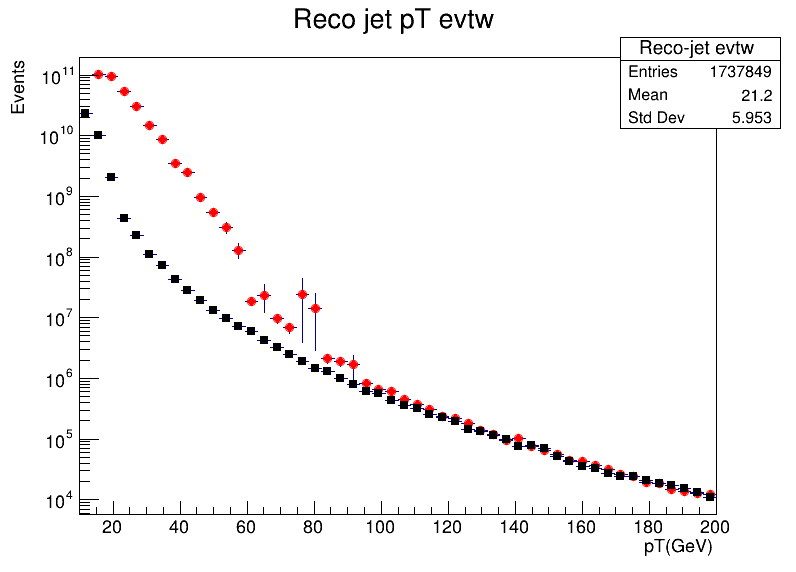

In [16]:
//Draw the histograms that compare all reco jet pT and truth jet pT with event weight

hist_reco_pt_evtw->SetMarkerStyle(20);
hist_reco_pt_evtw->SetMarkerColor(kRed);
hist_reco_pt_evtw->SetFillStyle(1001);
hist_reco_pt_evtw->SetFillColor(kRed);
hist_reco_pt_evtw->Draw("");
hist_truth_pt_evtw->SetMarkerStyle(21);
hist_truth_pt_evtw->SetMarkerColor(kBlack);
hist_truth_pt_evtw->SetFillStyle(1003);
hist_truth_pt_evtw->SetFillColor(kBlack);
hist_truth_pt_evtw->Draw("same");
canvas->SetLogy();
canvas->Draw();

# ---------------------------------------------------------------------------------------------------------------


Now we will study the jets pileup dependence 

In [17]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

Plot jet pt vs. pileup

In [18]:
TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",300,1,300, 80, 0, 80);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",300,0,300, 0, 200);

Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [19]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [20]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

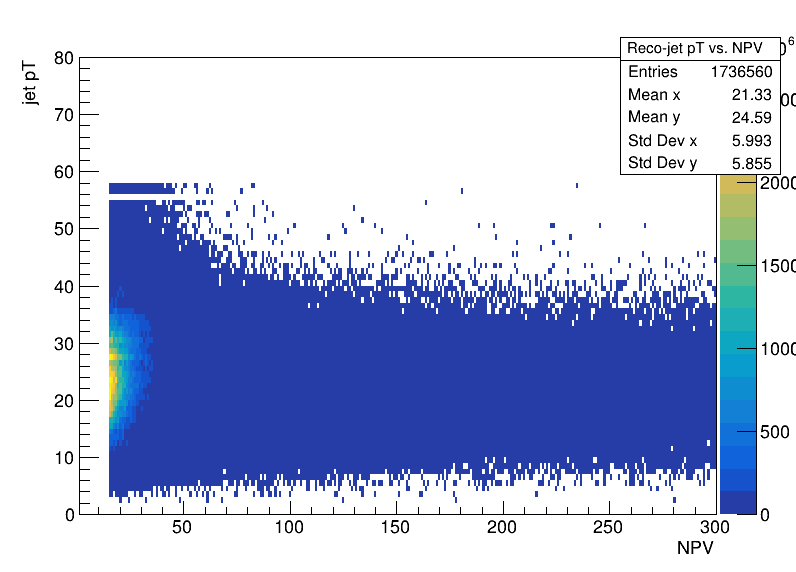

In [21]:
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

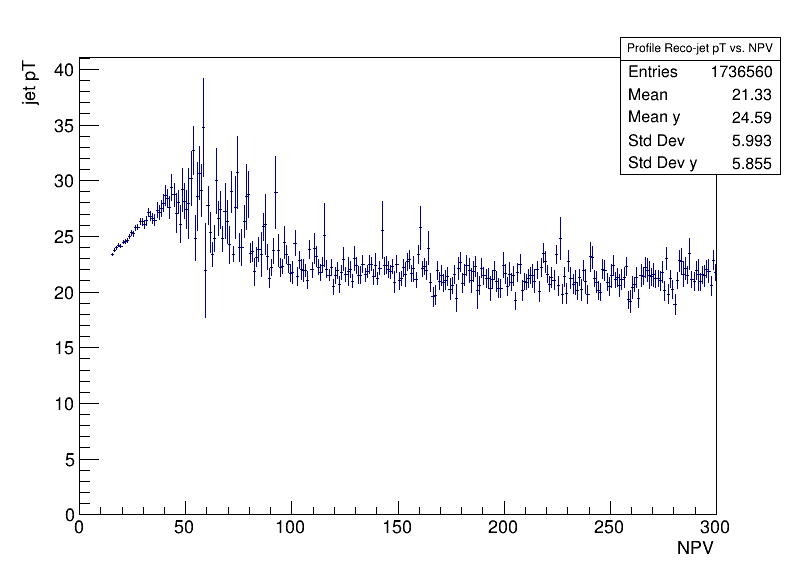

In [22]:
prof_jetpt_npv->Draw("");
canvas2->Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

# Plots for reco and truth jet pT vs pileup

In [23]:
// reco and truth jet R4 pT vs pileup

TH2F *hist_reco_jetR4_pt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",300,1,300,80,0,80);
TH2F *hist_truth_jetR4_pt_npv = new TH2F("Truth-jet pT vs. NPV", ";NPV; jet pT", 300,1,300,80,0,80);
TProfile *prof_recoR4_pt_npv = new TProfile("Profile Reco-jet pT vs. NPV", ";NPV; jet pT",300,0,300,0,200);
TProfile *prof_truthR4_pt_npv = new TProfile("Profile Truth-jet pT vs. NPV", ";NPV; jet pT",300,0,300,0,200);

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.)
    {
        for(int jj=0; jj<reco_R4_pt->size(); jj++)
        {
            hist_reco_jetR4_pt_npv->Fill(reco_R4_pt->at(jj)/1000., npv, evtw);
            prof_recoR4_pt_npv->Fill(reco_R4_pt->at(jj)/1000., npv, evtw);
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.)
    {
        for(int kk=0; kk<truth_R4_pt->size(); kk++)
        {
            hist_truth_jetR4_pt_npv->Fill(truth_R4_pt->at(kk)/1000., npv, evtw);
            prof_truthR4_pt_npv->Fill(truth_R4_pt->at(kk)/1000., npv, evtw);
        }
    }
}

Warning in <TDavixFile::Append>: Replacing existing TH1: Reco-jet pT vs. NPV (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Profile Reco-jet pT vs. NPV (Potential memory leak).


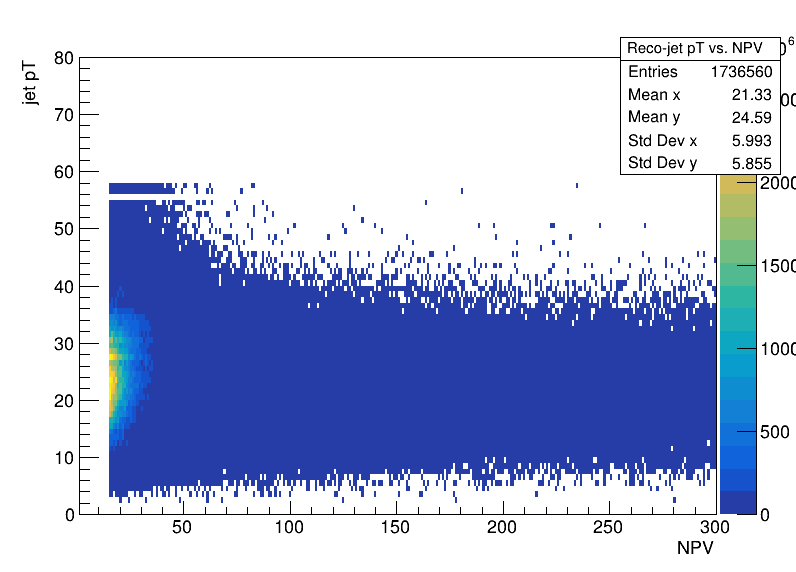

In [24]:
// Draw 2D histograms reco jet R4 pt vs pileup

hist_reco_jetR4_pt_npv->Draw("colz");
canvas2->Draw();

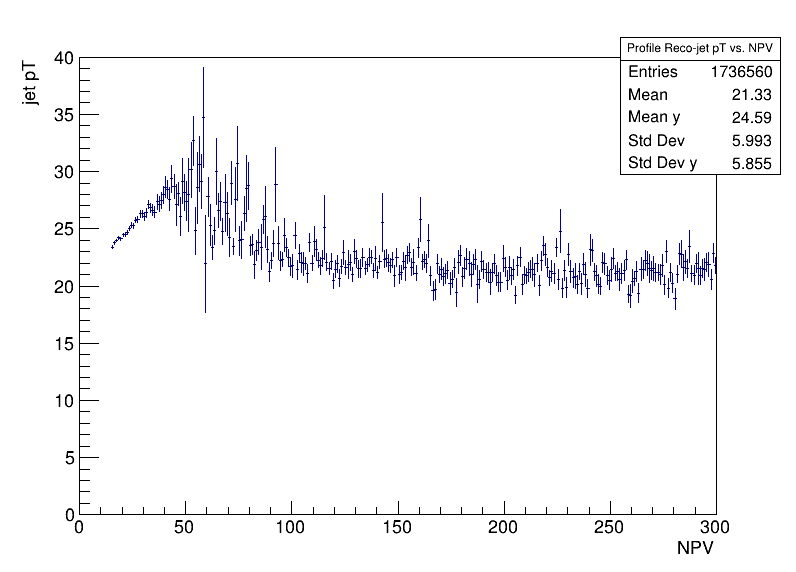

In [25]:
// Draw profile of reco jet R4 pt vs pileup

prof_recoR4_pt_npv->Draw("");
prof_recoR4_pt_npv->GetYaxis()->SetRangeUser(0, 40);
canvas2->Draw();

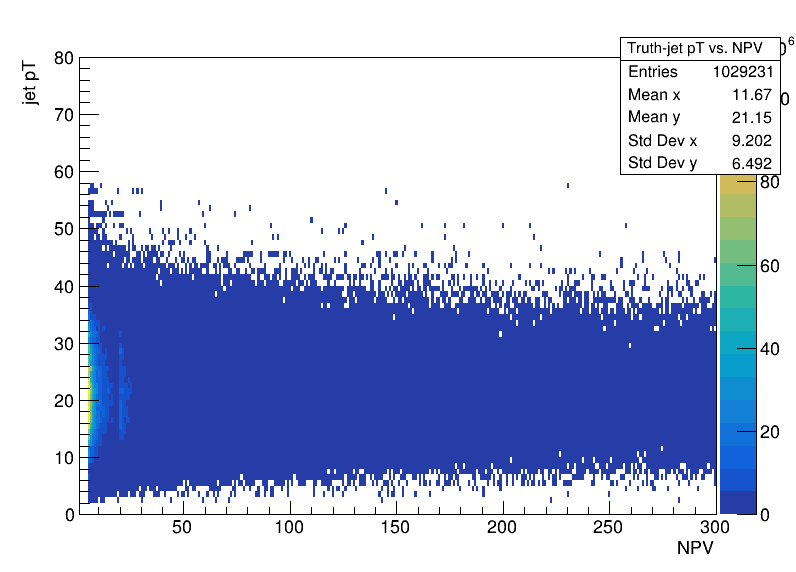

In [26]:
// Draw 2D histograms truth jet R4 pt vs pileup

hist_truth_jetR4_pt_npv->Draw("colz");
canvas2->Draw();

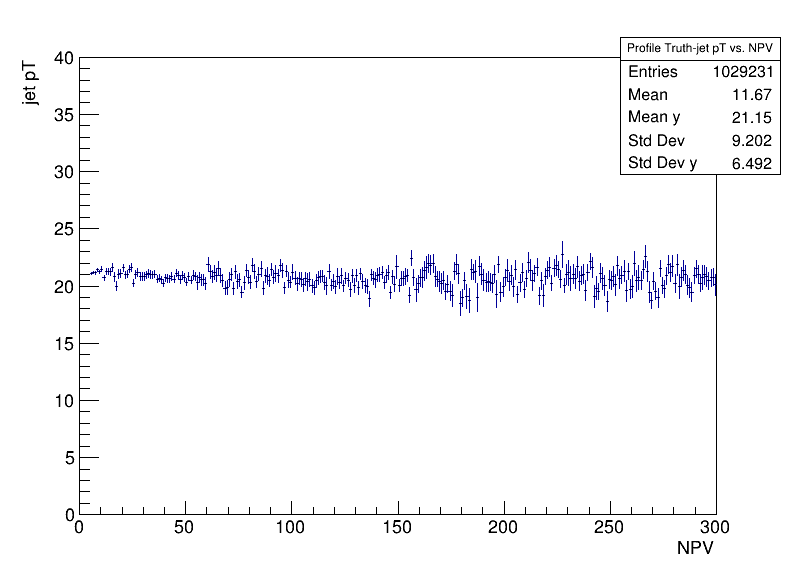

In [27]:
// Draw profile of truth jet R4 pt vs pileup

prof_truthR4_pt_npv->Draw("");
prof_truthR4_pt_npv->GetYaxis()->SetRangeUser(0, 40);
canvas2->Draw();

# -----------------------------------------------------------------------------------------------------

In [28]:
vector<float> *reco_R10_pt;
vector<float> *truth_R10_pt;

tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt);
tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt);

In [29]:
// reco and truth jet R10 pT vs pileup

TH2F *hist_reco_jetR10_pt_npv = new TH2F("Reco-jetR10 pT vs. NPV",";NPV; jet pT",300,150,450,80,0,80);
TH2F *hist_truth_jetR10_pt_npv = new TH2F("Truth-jetR10 pT vs. NPV", ";NPV; jet pT", 300,150,450,80,0,80);
TProfile *prof_recoR10_pt_npv = new TProfile("Profile Reco-jetR10 pT vs. NPV", ";NPV; jet pT",300,150,450,0,200);
TProfile *prof_truthR10_pt_npv = new TProfile("Profile Truth-jetR10 pT vs. NPV", ";NPV; jet pT",300,150,450,0,200);

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R10_pt->size()!=0 && reco_R10_pt->at(0)>20000.)
    {
        for(int jj=0; jj<reco_R10_pt->size(); jj++)
        {
            hist_reco_jetR10_pt_npv->Fill(reco_R10_pt->at(jj)/1000., npv, evtw);
            prof_recoR10_pt_npv->Fill(reco_R10_pt->at(jj)/1000., npv, evtw);
        }
    }
    
    if(truth_R10_pt->size()!=0 && truth_R10_pt->at(0)>20000.)
    {
        for(int kk=0; kk<truth_R10_pt->size(); kk++)
        {
            hist_truth_jetR10_pt_npv->Fill(truth_R10_pt->at(kk)/1000., npv, evtw);
            prof_truthR10_pt_npv->Fill(truth_R10_pt->at(kk)/1000., npv, evtw);
        }
    }
}

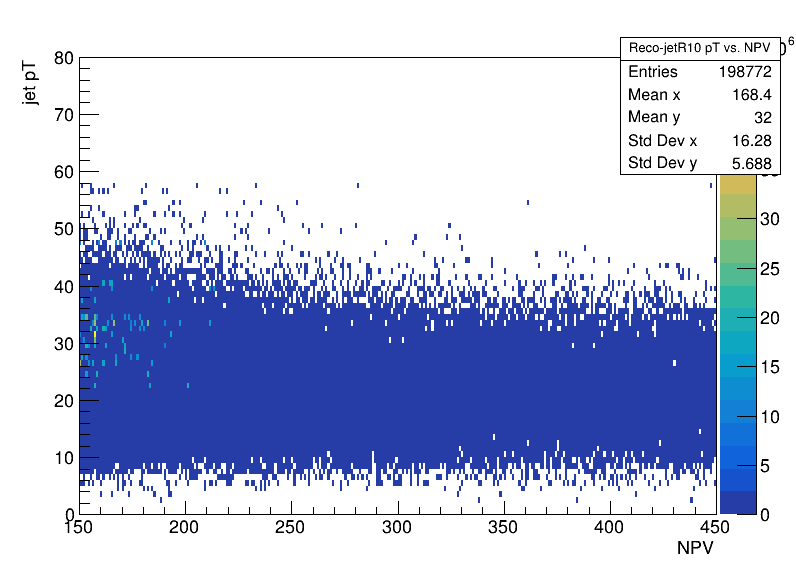

In [30]:
// Draw 2D histograms reco jet R10 pt vs pileup

hist_reco_jetR10_pt_npv->Draw("colz");
canvas2->Draw();

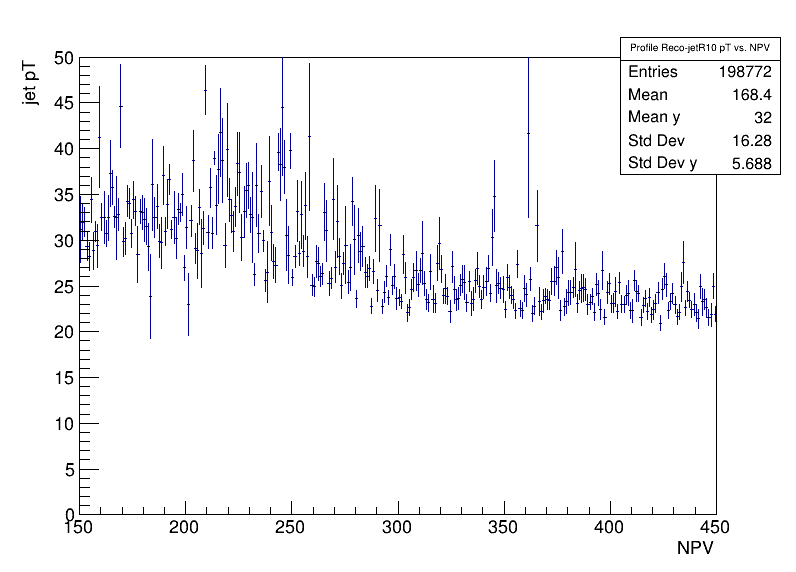

In [31]:
// Draw profile of reco jet R10 pt vs pileup

prof_recoR10_pt_npv->Draw("");
prof_recoR10_pt_npv->GetYaxis()->SetRangeUser(0, 50);
canvas2->Draw();

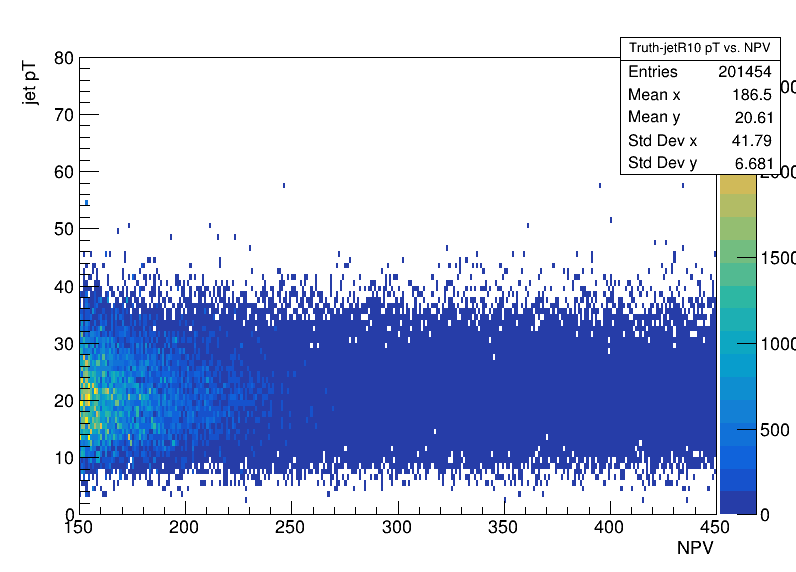

In [32]:
// Draw 2D histograms truth jet R10 pt vs pileup

hist_truth_jetR10_pt_npv->Draw("colz");
canvas2->Draw();

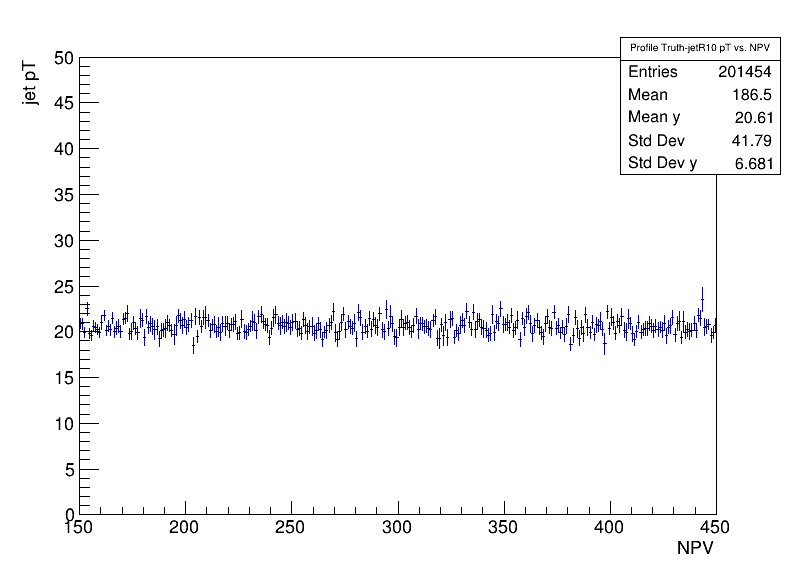

In [33]:
// Draw profile of truth jet R10 pt vs pileup

prof_truthR10_pt_npv->Draw("");
prof_truthR10_pt_npv->GetYaxis()->SetRangeUser(0, 50);
canvas2->Draw();

# Falta dar una explicación del por que con los truth jets es más estable (se linealiza) el pt vs pileup.
# ----------------------------------------------------------------------------------------------------------------------------------

Plot the JVF (Jet Vertex Fraction) variable

In [34]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [35]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);

Warning in <TDavixFile::Append>: Replacing existing TH1: Lead Reco-jet JVF (Potential memory leak).


In [36]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
        
    }
}

std::cout << "Done!" << std::endl;

Done!


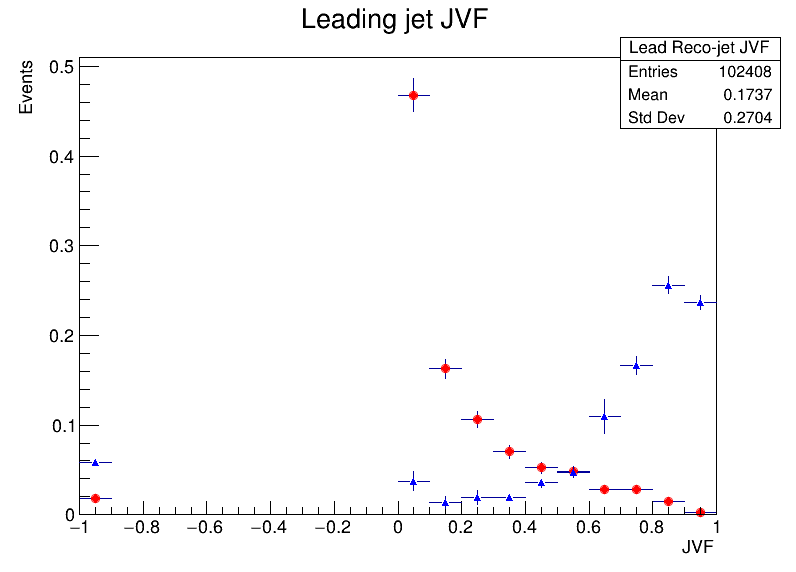

In [37]:
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
canvas2->Draw();

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

In [38]:
//vector<float> *truth_R4_jvf;

//tree->SetBranchAddress("TruthJets_R4_jvf", &truth_R4_jvf);

In [39]:
// Comparison between the leading jet pT for truth jets and reco jets without the cuts

TH1F *hist_lead_reco_jet_pt_wo_cut = new TH1F("lead reco jet pT wo cut", "lead truth and reco jet pT comparison without pT", 200, 0, 200);
TH1F *hist_lead_truth_jet_pt_wo_cut = new TH1F("lead truth jet pT wo cut", "lead truth and reco jet pT comparison without pT", 200, 0, 200);

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.)
    {
        hist_lead_reco_jet_pt_wo_cut->Fill(reco_R4_pt->at(0)/1000., evtw);
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.)
    {
        hist_lead_truth_jet_pt_wo_cut->Fill(truth_R4_pt->at(0)/1000., evtw);
    }
}

cout << "Done!" << endl;

Done!


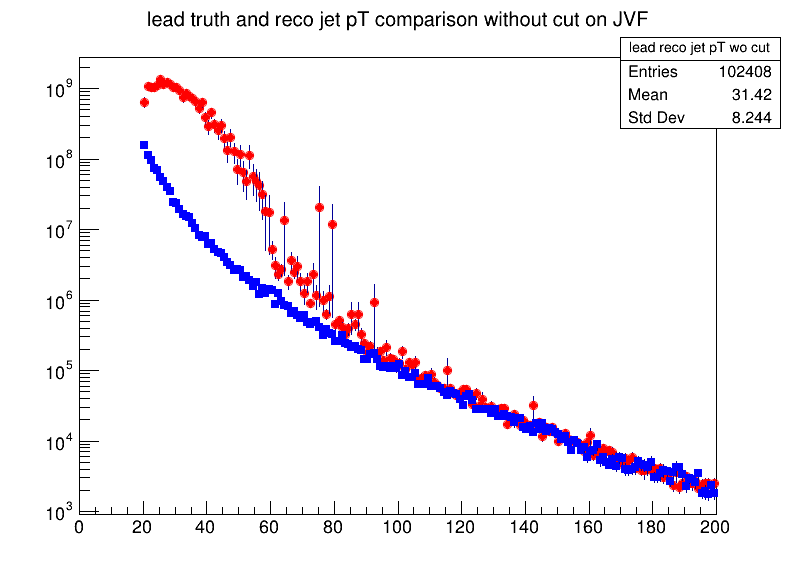

In [40]:
//Draw the histograms that compare leading reco and truth jet pT with event weight and without cut on JVF

hist_lead_reco_jet_pt_wo_cut->SetMarkerStyle(20);
hist_lead_reco_jet_pt_wo_cut->SetMarkerColor(kRed);
hist_lead_reco_jet_pt_wo_cut->SetFillStyle(1001);
hist_lead_reco_jet_pt_wo_cut->SetFillColorAlpha(kBlue, 0.8);
hist_lead_reco_jet_pt_wo_cut->SetTitle("lead truth and reco jet pT comparison without cut on JVF");
hist_lead_reco_jet_pt_wo_cut->Draw("");
hist_lead_truth_jet_pt_wo_cut->SetMarkerStyle(21);
hist_lead_truth_jet_pt_wo_cut->SetMarkerColor(kBlue);
hist_lead_truth_jet_pt_wo_cut->SetFillStyle(1003);
hist_lead_truth_jet_pt_wo_cut->SetFillColorAlpha(kRed, 0.5);
hist_lead_truth_jet_pt_wo_cut->Draw("same");
canvas2->SetLogy();
canvas2->Draw();

# ----------------------------------------------------------------------------------------------------------------------

In [41]:
// Comparison between the leading jet pT for truth jets and reco jets with the cut on JVF

TH1F *hist_lead_reco_jet_pt_with_cut = new TH1F("lead reco jet pT with cut", "lead truth and reco jet pT comparison without cut on JVF", 200, 0, 200);
TH1F *hist_lead_truth_jet_pt_with_cut = new TH1F("lead truth jet pT with cut", "lead truth and reco jet pT comparison without cut on JVF", 200, 0, 200);

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000. && fabs(reco_R4_jvf->at(0))>0.5) //Adding the cut |JVF|>0.5
    {
        hist_lead_reco_jet_pt_wo_cut->Fill(reco_R4_pt->at(0)/1000., evtw);
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.)
    {
        hist_lead_truth_jet_pt_wo_cut->Fill(truth_R4_pt->at(0)/1000., evtw);
    }
}

cout << "Done!" << endl;

Done!


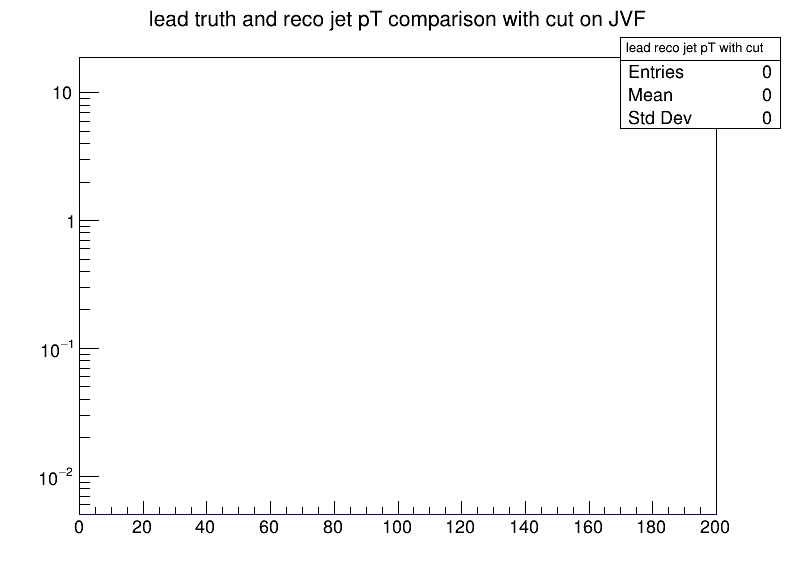

In [42]:
//Draw the histograms that compare leading reco and truth jet pT with event weight and cut on JVF

hist_lead_reco_jet_pt_with_cut->SetMarkerStyle(20);
hist_lead_reco_jet_pt_with_cut->SetMarkerColor(kRed);
hist_lead_reco_jet_pt_with_cut->SetFillStyle(1001);
hist_lead_reco_jet_pt_with_cut->SetFillColorAlpha(kBlue, 0.8);
hist_lead_reco_jet_pt_with_cut->SetTitle("lead truth and reco jet pT comparison with cut on JVF");
hist_lead_reco_jet_pt_with_cut->Draw("");
hist_lead_truth_jet_pt_with_cut->SetMarkerStyle(21);
hist_lead_truth_jet_pt_with_cut->SetMarkerColor(kBlue);
hist_lead_truth_jet_pt_with_cut->SetFillStyle(1003);
hist_lead_truth_jet_pt_with_cut->SetFillColorAlpha(kRed, 0.5);
hist_lead_truth_jet_pt_with_cut->Draw("same");
canvas2->SetLogy();
canvas2->Draw();

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [43]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);

In [44]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

In [45]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;


Done!


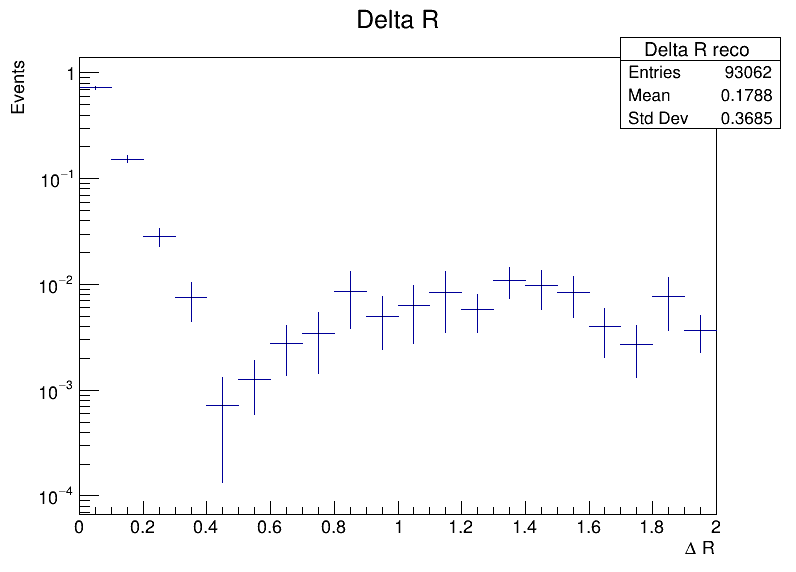

In [46]:
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->DrawNormalized("");
canvas2->Draw();

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

<b>Excercises: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).
8. Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.  

</b>